Saving observations.csv to observations.csv
Saving species_info.csv to species_info.csv
Species Dataset Shape: (5824, 4)
Observations Dataset Shape: (23296, 3)

Missing Values Before Cleaning:
category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64

Missing Values After Cleaning:
category               0
scientific_name        0
common_names           0
conservation_status    0
dtype: int64

Conservation Status Counts:
conservation_status
No Intervention       5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: count, dtype: int64


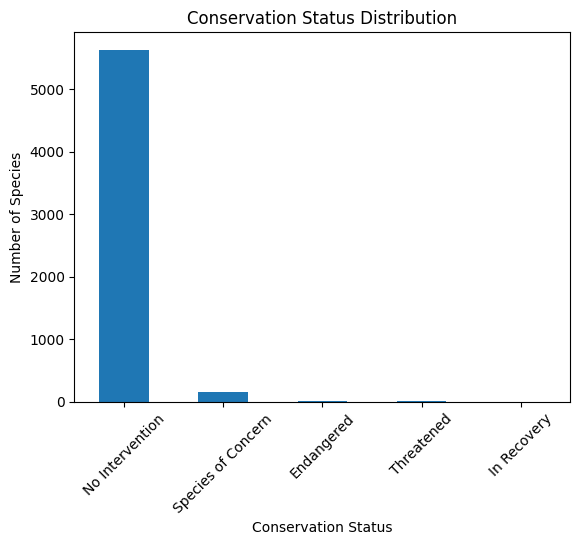


Endangered Species by Category:
category
Mammal            7
Bird              4
Fish              3
Vascular Plant    1
Amphibian         1
Name: count, dtype: int64


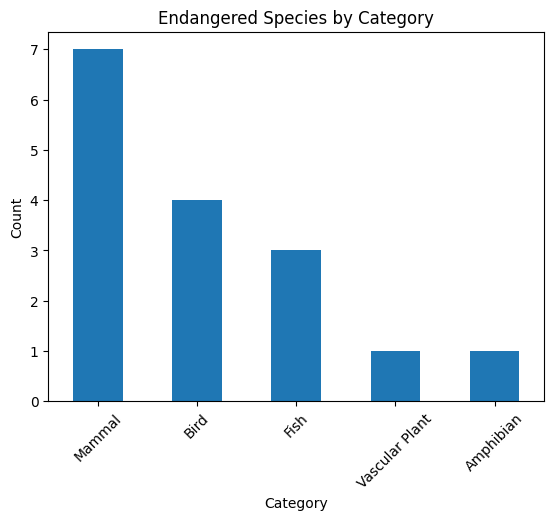


Endangered Species Observations by Park:
park_name
Bryce National Park                     619
Great Smoky Mountains National Park     393
Yellowstone National Park              1558
Yosemite National Park                  943
Name: observations, dtype: int64


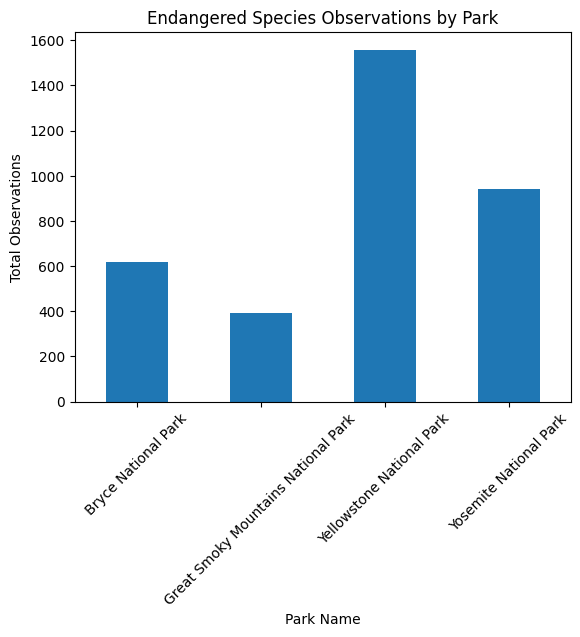


========== PROJECT SUMMARY ==========
Total Unique Species: 5541
Total Endangered Species: 15
Percentage Endangered: 0.27 %
Most Endangered Category: Mammal
Park With Most Endangered Observations: Yellowstone National Park


In [1]:
# ================================
# BIODIVERSITY PROJECT – FULL ANALYSIS
# ================================

# -------- 1. Upload Files --------
from google.colab import files
uploaded = files.upload()

# -------- 2. Import Libraries --------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# -------- 3. Load Data --------
species = pd.read_csv("species_info.csv")
observations = pd.read_csv("observations.csv")

print("Species Dataset Shape:", species.shape)
print("Observations Dataset Shape:", observations.shape)

# -------- 4. Data Cleaning --------
print("\nMissing Values Before Cleaning:")
print(species.isnull().sum())

species['conservation_status'] = species['conservation_status'].fillna("No Intervention")

print("\nMissing Values After Cleaning:")
print(species.isnull().sum())

# -------- 5. Conservation Status Breakdown --------
status_counts = species['conservation_status'].value_counts()

print("\nConservation Status Counts:")
print(status_counts)

# Plot Conservation Status
plt.figure()
status_counts.plot(kind='bar')
plt.title("Conservation Status Distribution")
plt.xlabel("Conservation Status")
plt.ylabel("Number of Species")
plt.xticks(rotation=45)
plt.show()

# -------- 6. Endangered Species Analysis --------
endangered = species[species['conservation_status'] == "Endangered"]

category_counts = endangered['category'].value_counts()

print("\nEndangered Species by Category:")
print(category_counts)

plt.figure()
category_counts.plot(kind='bar')
plt.title("Endangered Species by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# -------- 7. Merge Datasets --------
merged = observations.merge(species, on='scientific_name')

# -------- 8. Endangered Species by Park --------
park_endangered = merged[merged['conservation_status'] == "Endangered"]

park_counts = park_endangered.groupby('park_name')['observations'].sum()

print("\nEndangered Species Observations by Park:")
print(park_counts)

plt.figure()
park_counts.plot(kind='bar')
plt.title("Endangered Species Observations by Park")
plt.xlabel("Park Name")
plt.ylabel("Total Observations")
plt.xticks(rotation=45)
plt.show()

# -------- 9. Key Metrics --------
total_species = species['scientific_name'].nunique()
total_endangered = endangered['scientific_name'].nunique()

print("\n========== PROJECT SUMMARY ==========")
print("Total Unique Species:", total_species)
print("Total Endangered Species:", total_endangered)
print("Percentage Endangered:", round((total_endangered / total_species) * 100, 2), "%")
print("Most Endangered Category:", category_counts.idxmax())
print("Park With Most Endangered Observations:", park_counts.idxmax())
print("=====================================")
